Skipping morpho_feature_lightning_attention_gbr_25_nuclei_ File is not a zip file
Skipping morpho_feature_lightning_attention_gbr_25_nuclei_shallower File is not a zip file


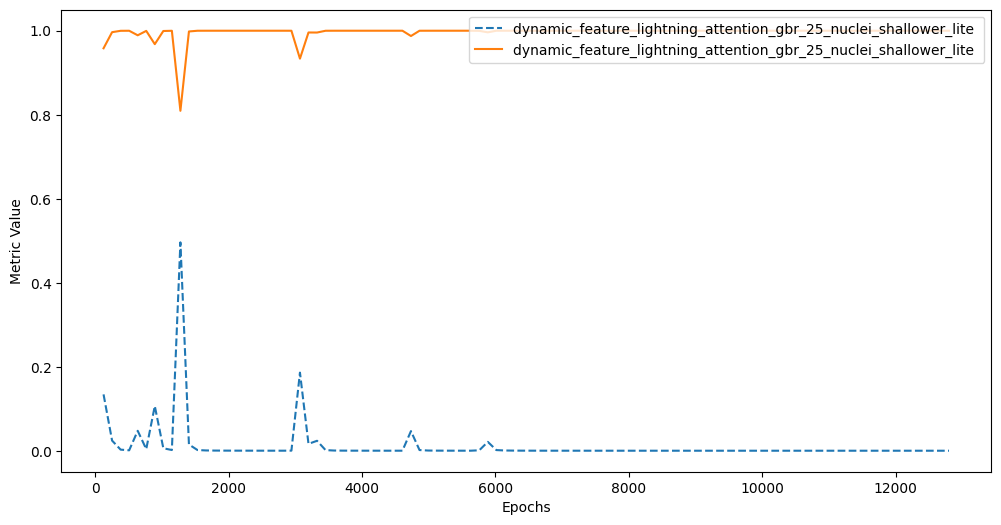

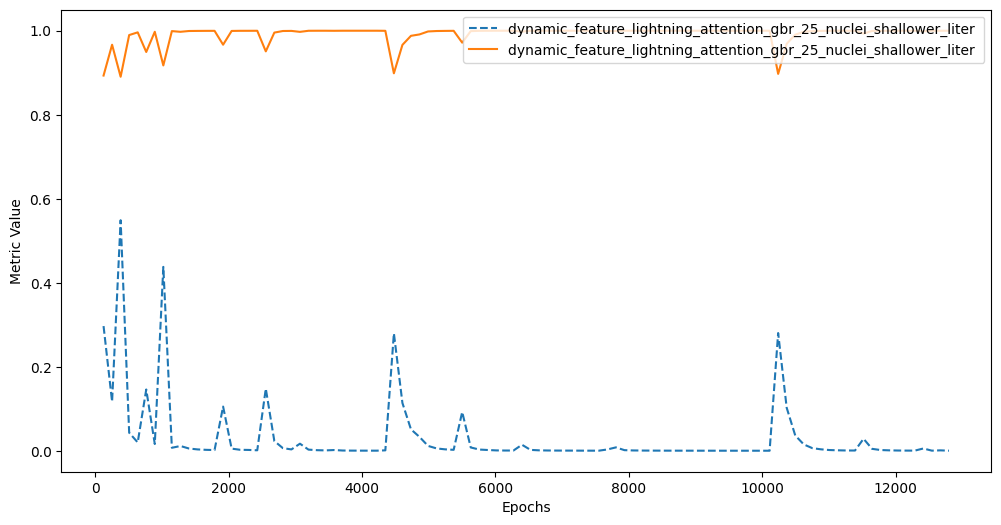

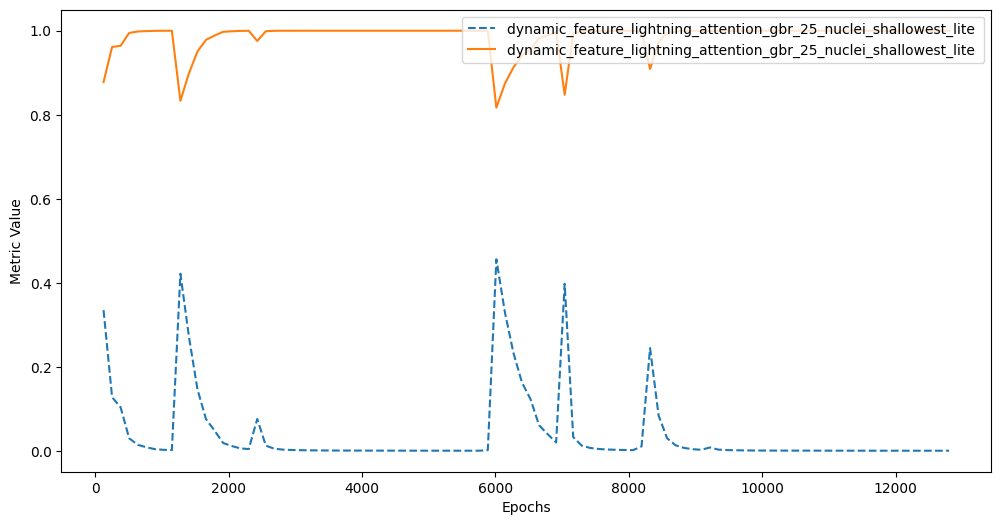

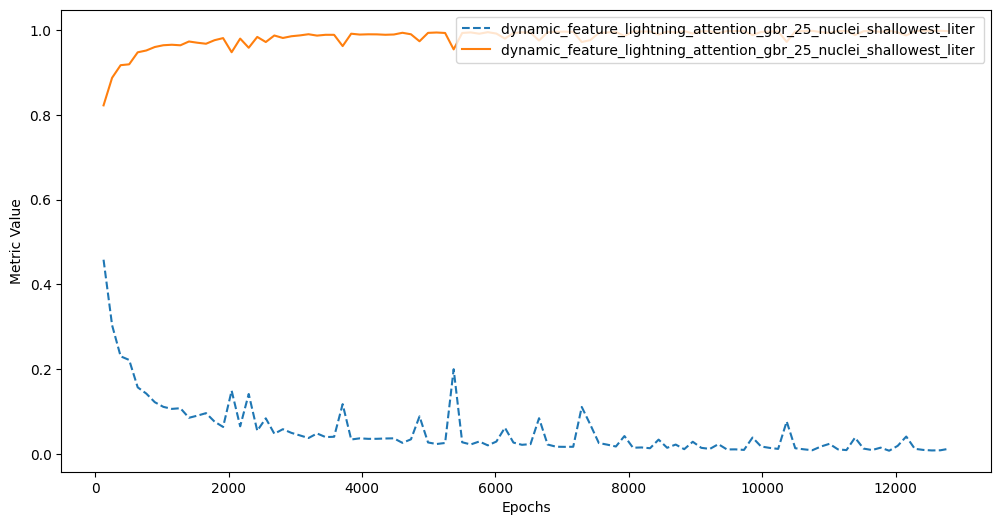

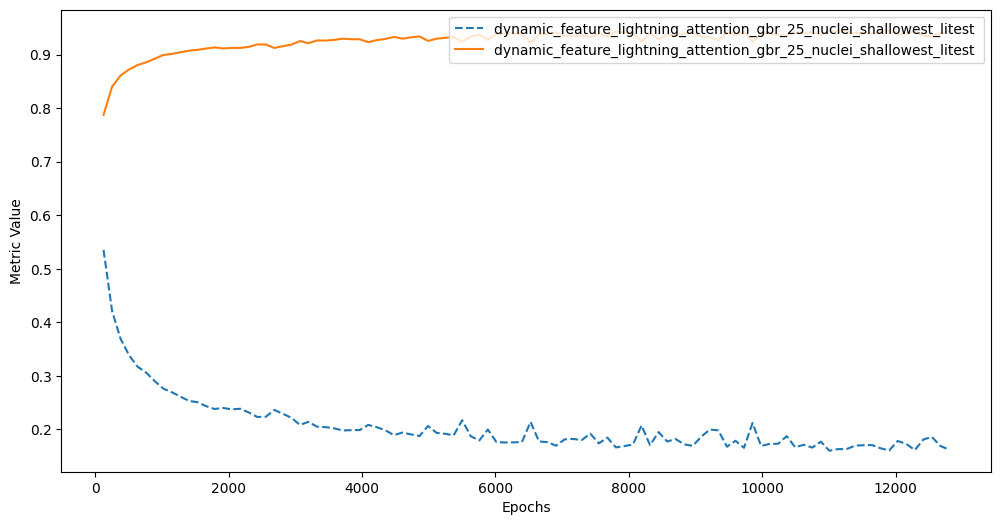

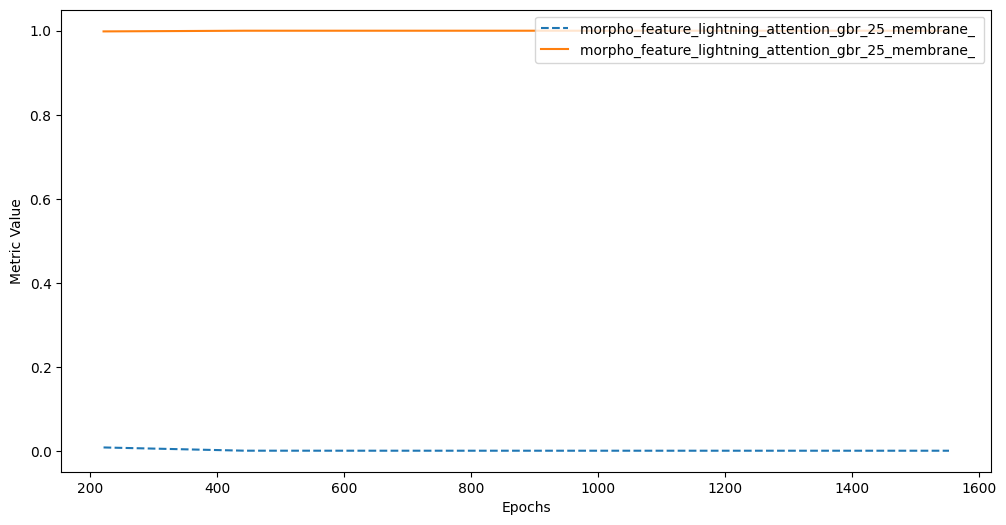

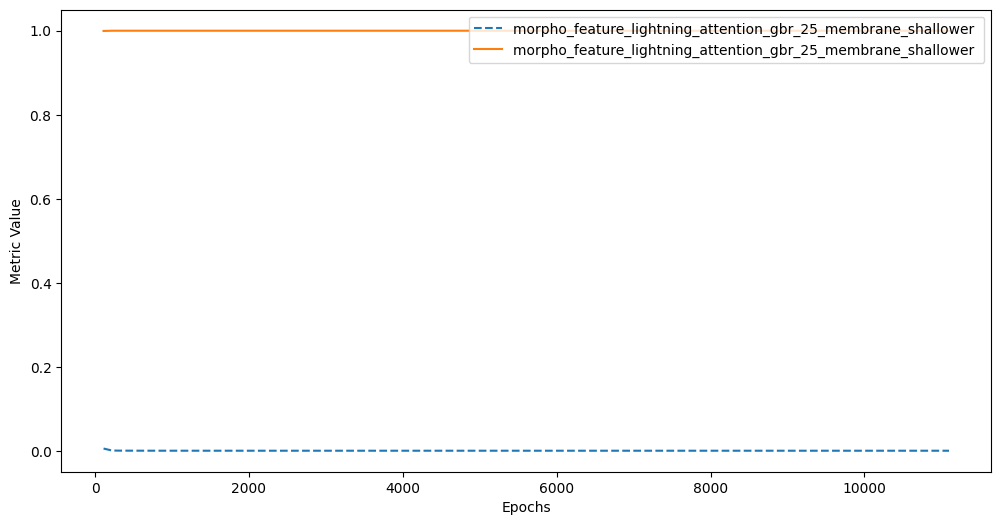

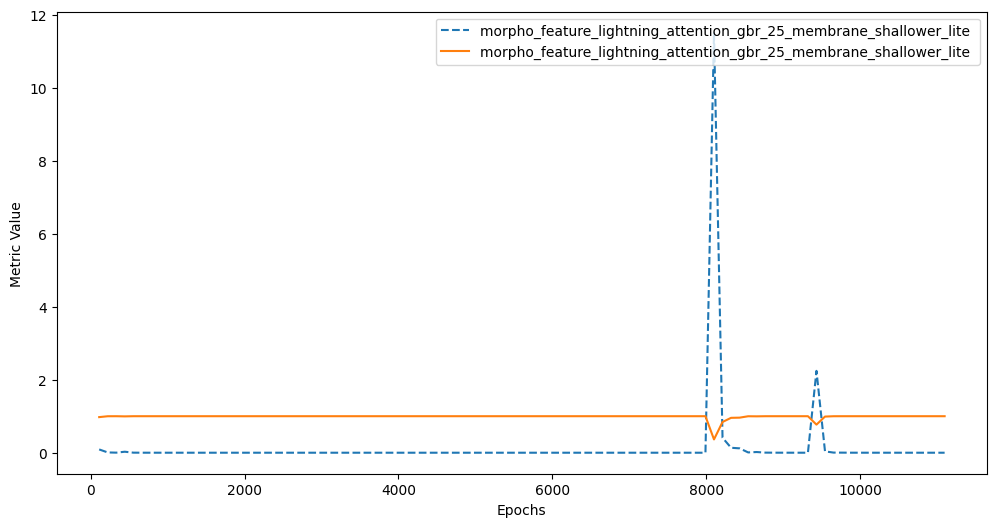

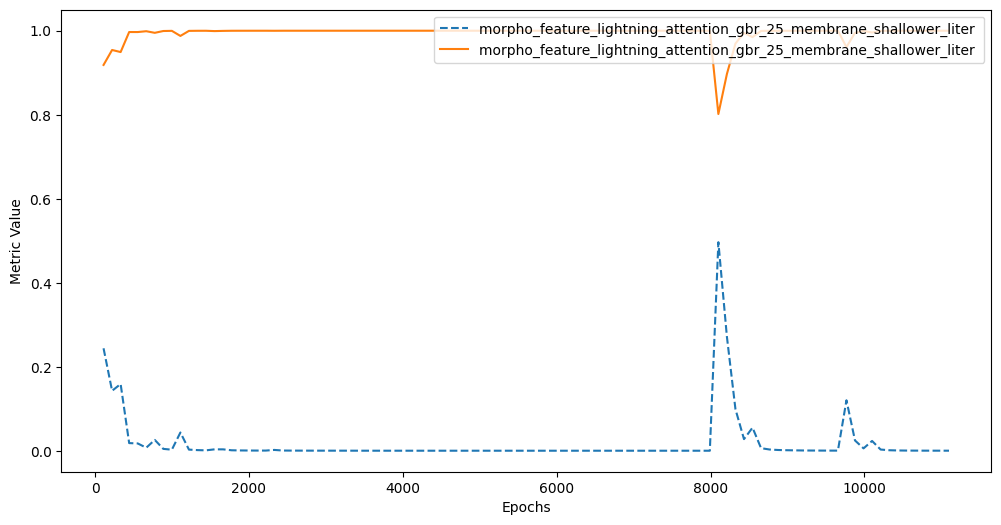

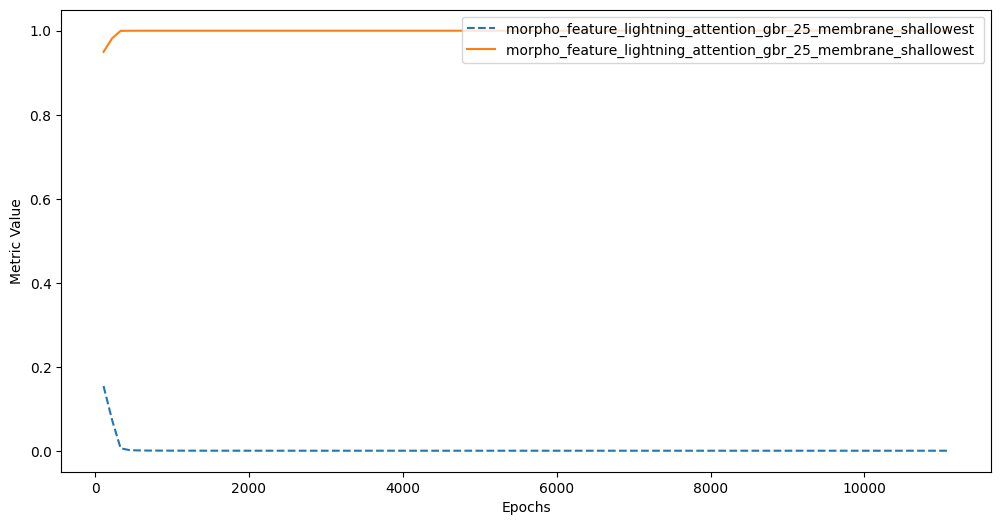

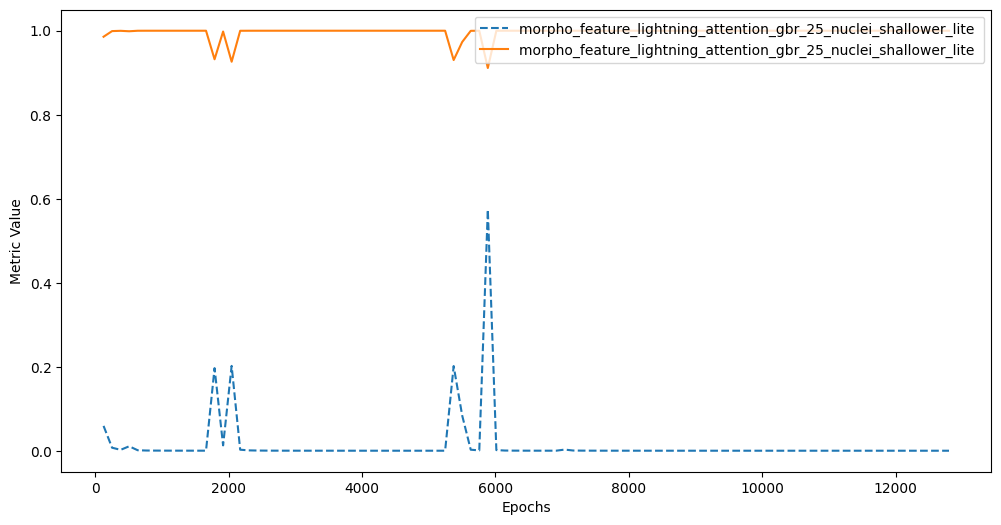

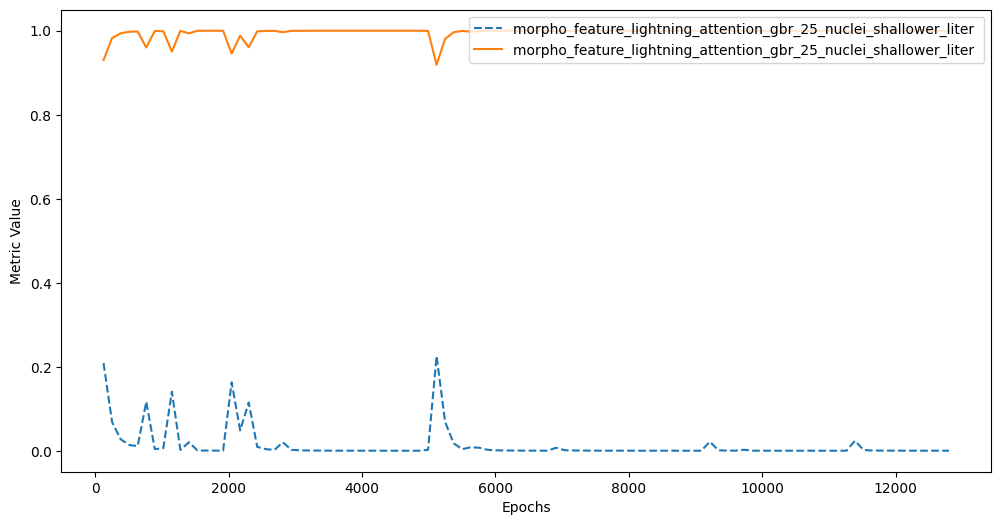

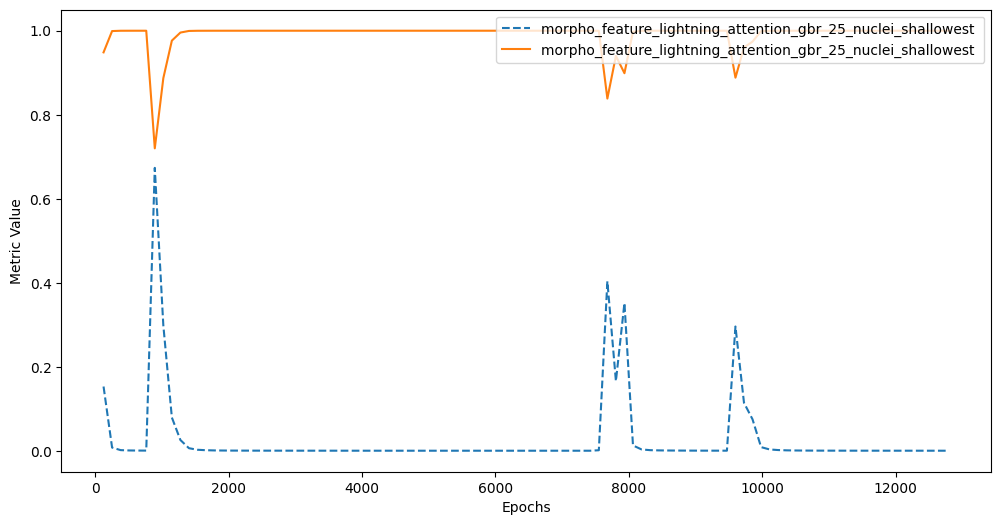

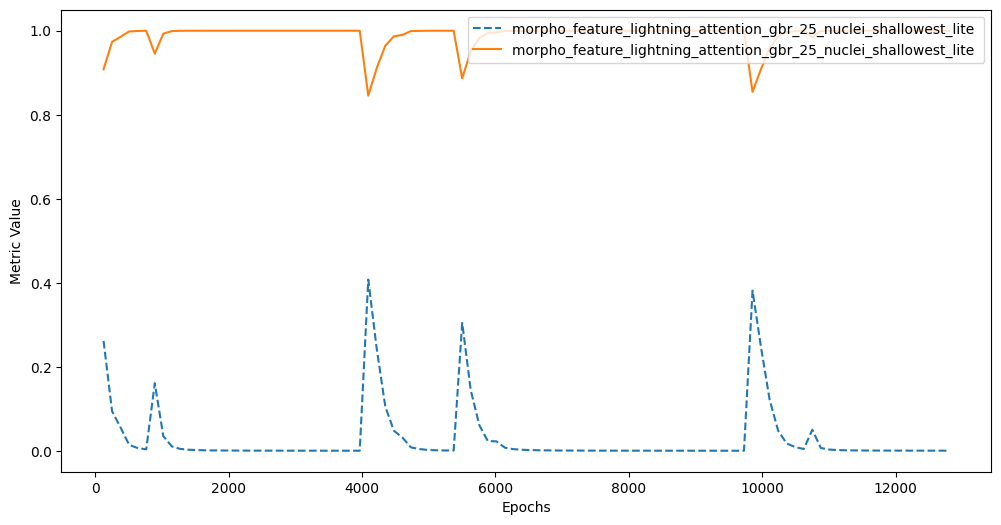

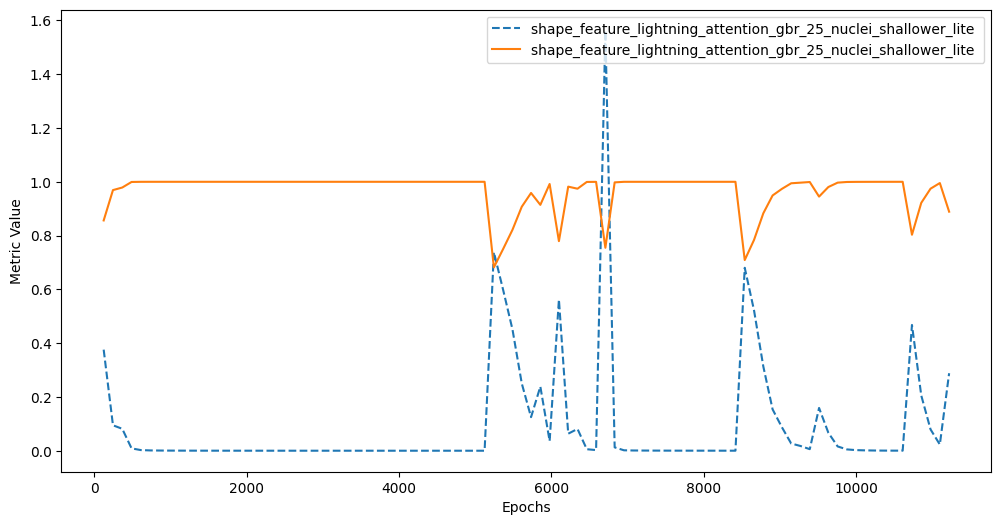

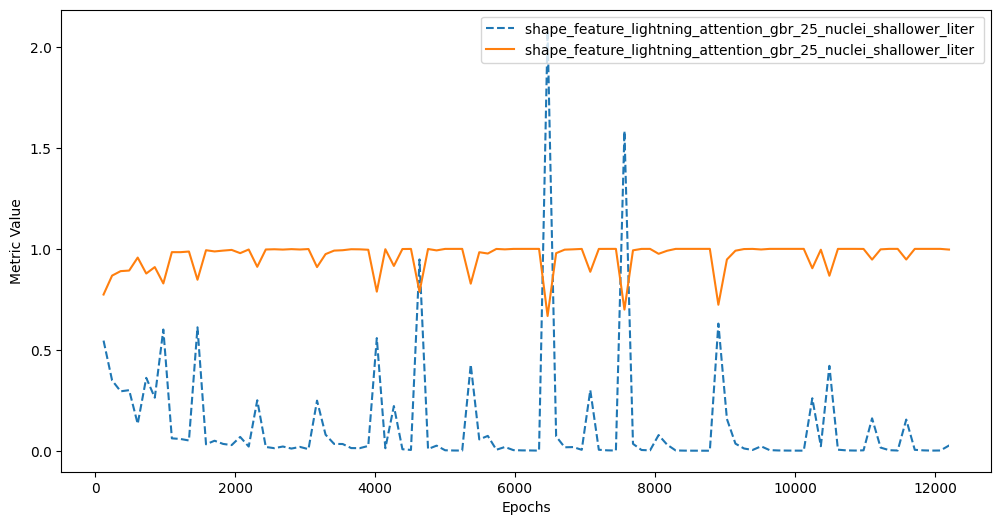

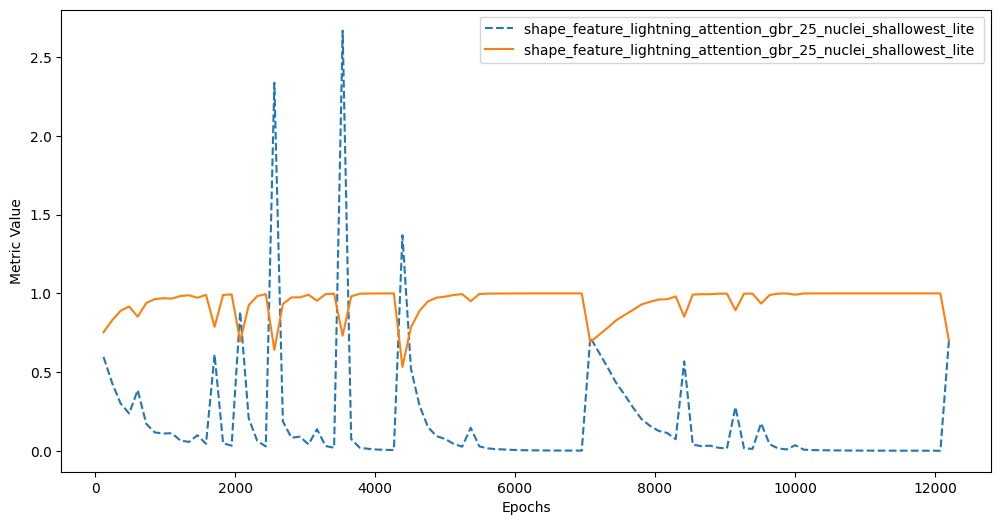

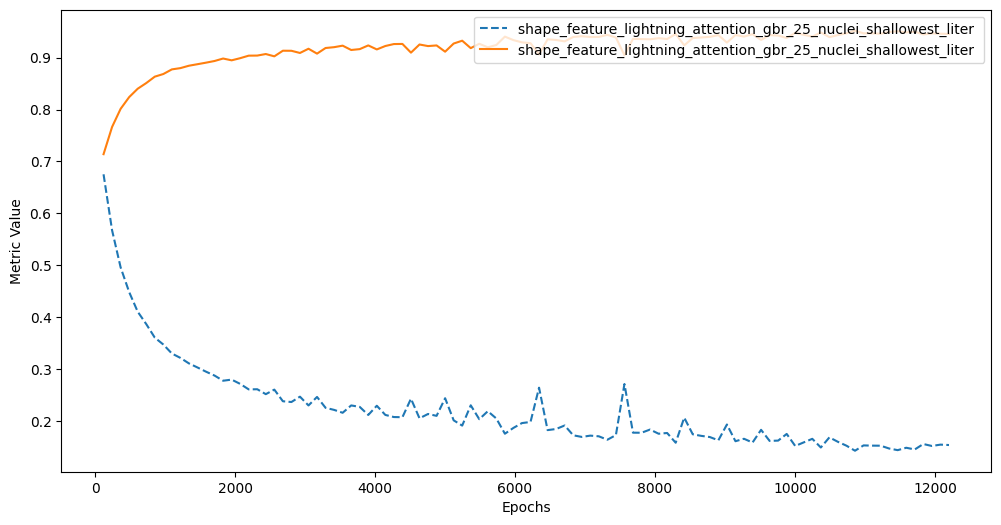

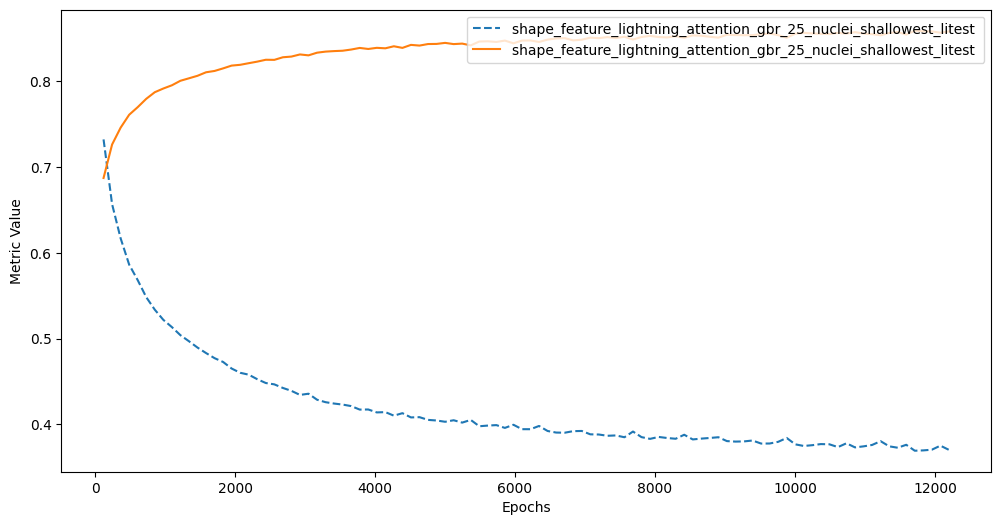

In [21]:

import os
import numpy as np
import matplotlib.pyplot as plt

# Define the directory containing subfolders with npz files
base_dir = '/home/debian/jz/Mari_Models/TrackModels'

# Initialize lists to store data for plotting
validation_loss_data = []
validation_accuracy_data = []
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path) and 'attention' in folder:
        # Find the npz file in the directory
        for file in os.listdir(folder_path):
            if file.endswith('.npz'):
                file_path = os.path.join(folder_path, file)
                try:
                    data = np.load(file_path, allow_pickle=True)
                    if 'validation_loss' in data:
                        steps = data['validation_loss'].item().get('steps', [])
                        values = data['validation_loss'].item().get('values', [])
                        if len(steps) == len(values):
                            validation_loss_data.append((steps, values))
                            folders.append(folder)
                    if 'validation_accuracy' in data:
                        acc_steps = data['validation_accuracy'].item().get('steps', [])
                        acc_values = data['validation_accuracy'].item().get('values', [])
                        if len(acc_steps) == len(acc_values):
                            validation_accuracy_data.append((acc_steps, acc_values))
                except Exception as e:
                    print(f'Skipping {folder} {e}') 

for i, folder in enumerate(folders):
    steps, values = validation_loss_data[i]
    plt.figure(figsize=(12, 6))
    plt.plot(steps, values, label=f'{folder} ', linestyle='--')
    
    # Plot validation accuracy if available
    if i < len(validation_accuracy_data):
        acc_steps, acc_values = validation_accuracy_data[i]
        plt.plot(acc_steps, acc_values, label=f'{folder} ')

    plt.xlabel('Epochs')
    plt.ylabel('Metric Value')
    plt.legend(loc='upper right')

